In [1]:
# import necessary Python packages to download the data set
import os
import zipfile
import sys
import pandas as pd
import numpy as np
# adjust the format of the data set
pd.options.display.float_format = '{:,.2f}'.format
np.set_printoptions(precision=2)

In [2]:
def load_data(data_dir):
    """Load the GEFCom 2014 energy load data"""

    energy = pd.read_csv(os.path.join(data_dir, 'energy.csv'), parse_dates=['timestamp'])

    # Reindex the dataframe such that the dataframe has a record for every time point
    # between the minimum and maximum timestamp in the time series. This helps to 
    # identify missing time periods in the data (there are none in this dataset).

    energy.index = energy['timestamp']
    energy = energy.reindex(pd.date_range(min(energy['timestamp']),
                                          max(energy['timestamp']),
                                          freq='H'))
    energy = energy.drop('timestamp', axis=1)

    return energy

In [3]:
# This function unzips the GEFCom2014 data zip file and extracts the 'extended'
# load forecasting competition data. Data is saved in energy.csv
def extract_data(data_dir):
    GEFCom_dir = os.path.join(data_dir, 'GEFCom2014', 'GEFCom2014 Data')

    GEFCom_zipfile = os.path.join(data_dir, 'GEFCom2014.zip')
    if not os.path.exists(GEFCom_zipfile):
        sys.exit("Download GEFCom2014.zip from https://www.dropbox.com/s/pqenrr2mcvl0hk9/GEFCom2014.zip?dl=0 and save it to the '{}' directory.".format(data_dir))

    # unzip root directory
    zip_ref = zipfile.ZipFile(GEFCom_zipfile, 'r')
    zip_ref.extractall(os.path.join(data_dir, 'GEFCom2014'))
    zip_ref.close()

    # extract the extended competition data
    zip_ref = zipfile.ZipFile(os.path.join(GEFCom_dir, 'GEFCom2014-E_V2.zip'), 'r')
    zip_ref.extractall(os.path.join(data_dir, 'GEFCom2014-E'))
    zip_ref.close()

    # load the data from Excel file
    data = pd.read_excel(os.path.join(data_dir, 'GEFCom2014-E', 'GEFCom2014-E.xlsx'), parse_dates=['Date'])

    # create timestamp variable from Date and Hour
    data['timestamp'] = data['Date'].add(pd.to_timedelta(data.Hour - 1, unit='h'))
    data = data[['timestamp', 'load', 'T']]
    data = data.rename(columns={'T':'temp'})

    # remove time period with no load data
    data = data[data.timestamp >= '2012-01-01']

    # save to csv
    data.to_csv(os.path.join(data_dir, 'energy.csv'), index=False)

In [4]:
data_dir = 'E:\datasets\energy'

In [5]:
#extract_data(data_dir)

In [6]:
ts_data_load = load_data(data_dir)[['load']]
ts_data_load.head()

,load
2012-01-01 00:00:00,"2,698.00"
2012-01-01 01:00:00,"2,558.00"
2012-01-01 02:00:00,"2,444.00"
2012-01-01 03:00:00,"2,402.00"
2012-01-01 04:00:00,"2,403.00"


In [7]:
ts_data_load.index

DatetimeIndex(['2012-01-01 00:00:00', '2012-01-01 01:00:00',
               '2012-01-01 02:00:00', '2012-01-01 03:00:00',
               '2012-01-01 04:00:00', '2012-01-01 05:00:00',
               '2012-01-01 06:00:00', '2012-01-01 07:00:00',
               '2012-01-01 08:00:00', '2012-01-01 09:00:00',
               ...
               '2014-12-31 14:00:00', '2014-12-31 15:00:00',
               '2014-12-31 16:00:00', '2014-12-31 17:00:00',
               '2014-12-31 18:00:00', '2014-12-31 19:00:00',
               '2014-12-31 20:00:00', '2014-12-31 21:00:00',
               '2014-12-31 22:00:00', '2014-12-31 23:00:00'],
              dtype='datetime64[ns]', length=26304, freq='H')

In [8]:
# import necessary Python packages
import statsmodels.api as sm
import warnings
import matplotlib
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
warnings.filterwarnings("ignore")

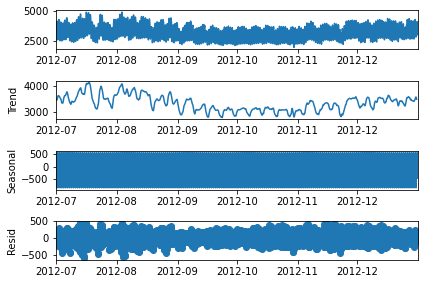

In [9]:
decomposition = sm.tsa.seasonal_decompose(ts_data_load['2012-07-01':'2012-12-31'], model = 'additive')
fig = decomposition.plot()
matplotlib.rcParams['figure.figsize'] = [20.0, 6.0]

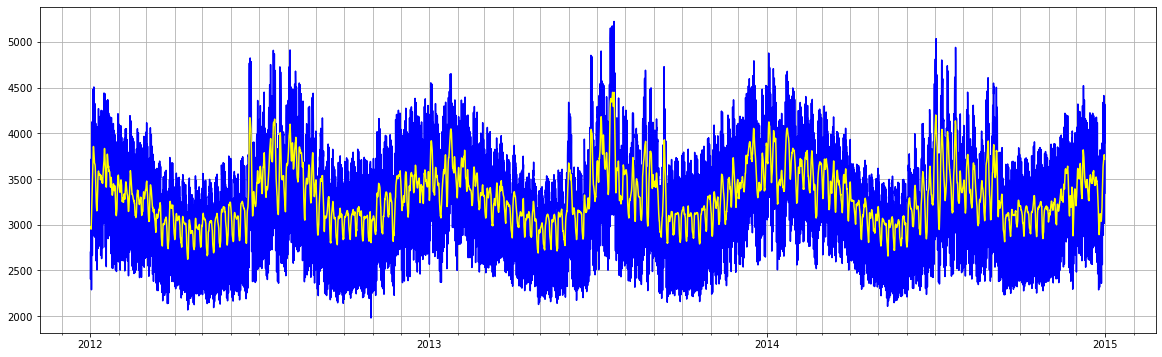

In [10]:
decomposition = sm.tsa.seasonal_decompose(ts_data_load, model = 'additive')
fig, ax = plt.subplots()
ax.grid(True)
year = mdates.YearLocator(month=1)
month = mdates.MonthLocator(interval=1)
year_format = mdates.DateFormatter('%Y')
month_format = mdates.DateFormatter('%m')
ax.xaxis.set_minor_locator(month)
ax.xaxis.grid(True, which = 'minor')
ax.xaxis.set_major_locator(year)
ax.xaxis.set_major_formatter(year_format)
plt.plot(ts_data_load.index, ts_data_load, c='blue')
plt.plot(decomposition.trend.index, decomposition.trend, c='yellow')

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

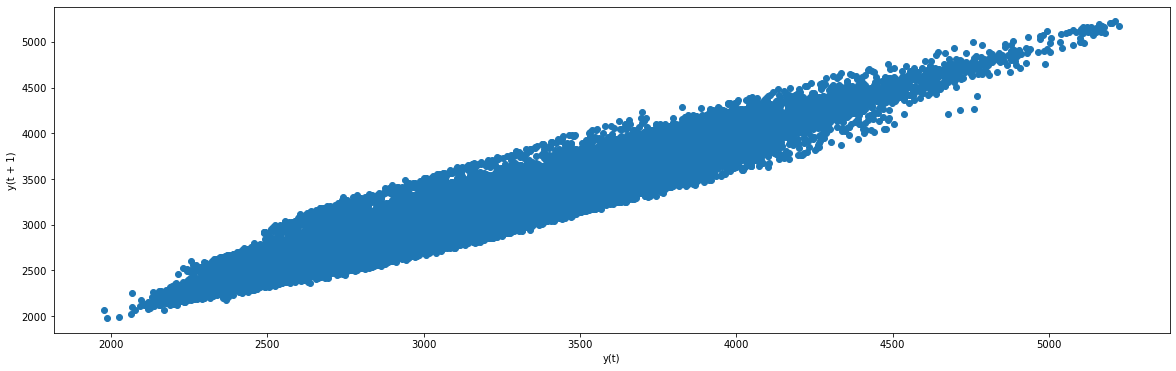

In [11]:
# Import lag_plot function
from pandas.plotting import lag_plot
plt.figure()
# Pass the lag argument and plot the values.
# When lag=1 the plot is essentially data[:-1] vs. data[1:]
# Plot our ts_data_load set
lag_plot(ts_data_load)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

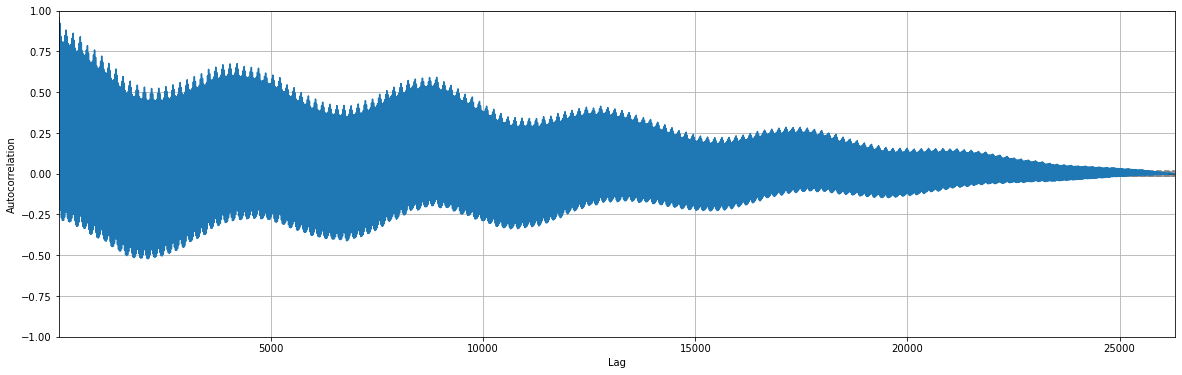

In [12]:
# Import autocorrelation_plot function
from pandas.plotting import autocorrelation_plot
plt.figure()
# Pass the autocorrelation argument and plot the values
autocorrelation_plot(ts_data_load)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

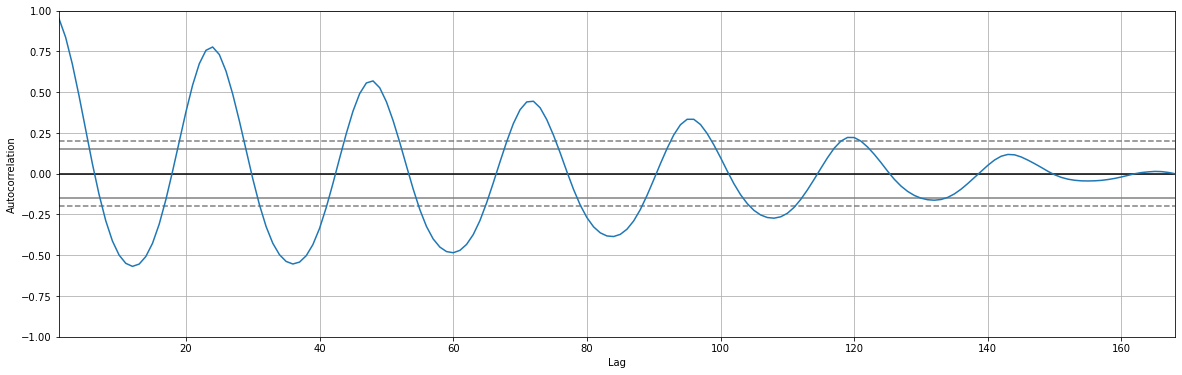

In [13]:
# Create subset
ts_data_load_subset = ts_data_load['2014-08-01':'2014-08-07']
# Import autocorrelation _plot function
from pandas.plotting import autocorrelation_plot
plt.figure()
# Pass the autocorrelation argument and plot the values
autocorrelation_plot(ts_data_load_subset)

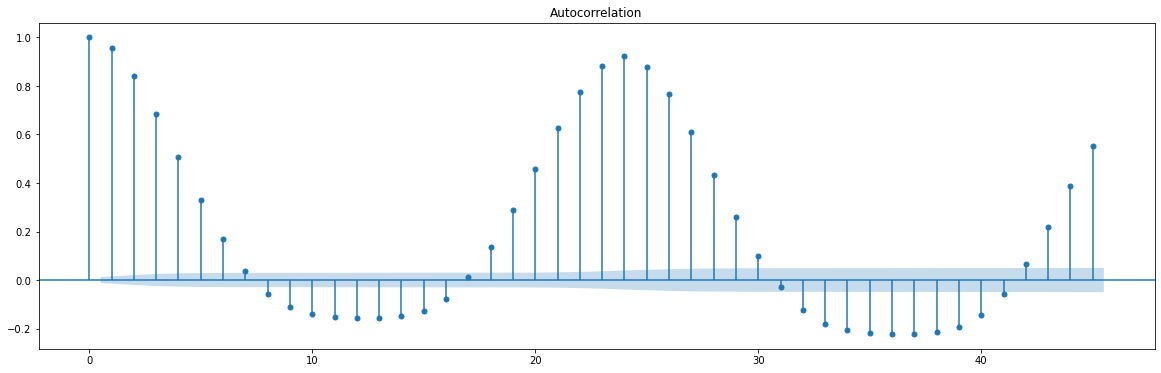

In [14]:
# Import plot_acf() function
from statsmodels.graphics.tsaplots import plot_acf
# Plot the acf function on the ts_data_load set
plot_acf(ts_data_load)
plt.show()

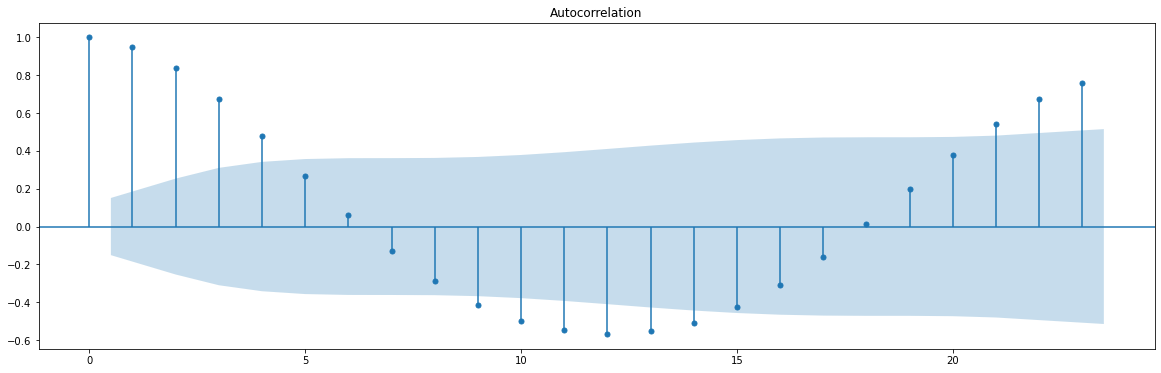

In [15]:
# Import plot_acf() function
from statsmodels.graphics.tsaplots import plot_acf
# Plot the acf function on the ts_data_load_subset
plot_acf(ts_data_load_subset)
plt.show()

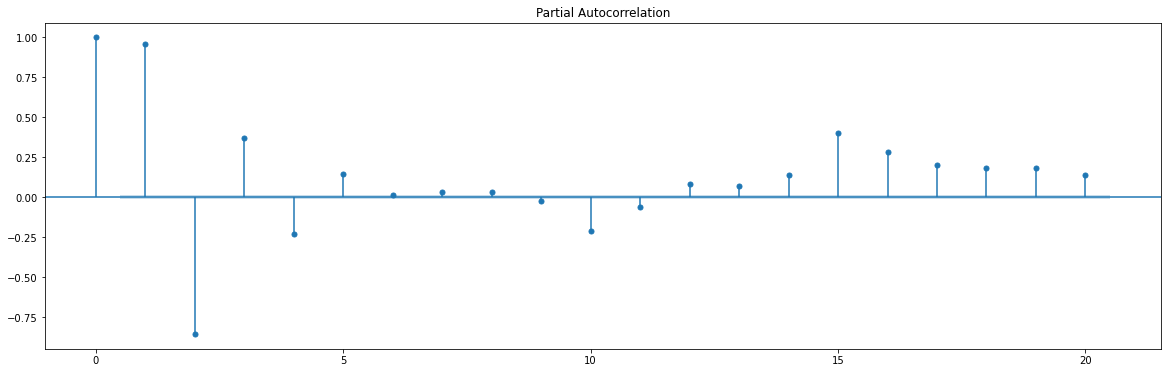

In [16]:
# Import plot_pacf() function
from statsmodels.graphics.tsaplots import plot_pacf
# Plot the pacf function on the ts_data_load dataset
plot_pacf(ts_data_load, lags=20)
plt.show()

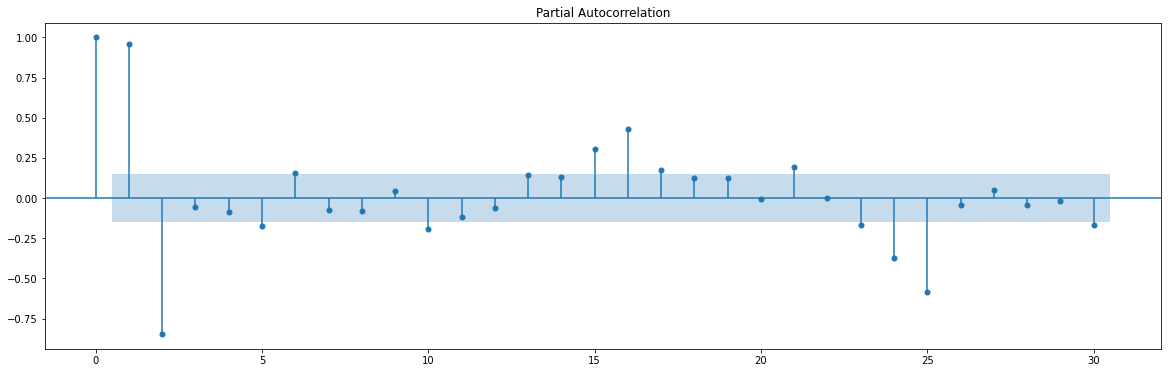

In [17]:
# import plot_pacf() function
from statsmodels.graphics.tsaplots import plot_pacf
# plot the pacf function on the ts_data_load_subset
plot_pacf(ts_data_load_subset, lags=30)
plt.show()

In [18]:
#Import necessary libraries
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.tsa.api import acf, pacf, graphics
# Apply AutoReg model
model = AutoReg(ts_data_load, 1)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                   load   No. Observations:                26304
Model:                     AutoReg(1)   Log Likelihood             -171639.978
Method:               Conditional MLE   S.D. of innovations            165.100
Date:                Wed, 05 May 2021   AIC                             10.213
Time:                        11:39:49   BIC                             10.214
Sample:                    01-01-2012   HQIC                            10.214
                         - 12-31-2014                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    144.5181      6.043     23.913      0.000     132.673     156.363
load.L1        0.9563      0.002    530.344      0.000       0.953       0.960
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0457           +0.0000j            1.0457            0.0000
-----------------------------------------------------------------------------
"""

No handles with labels found to put in legend.


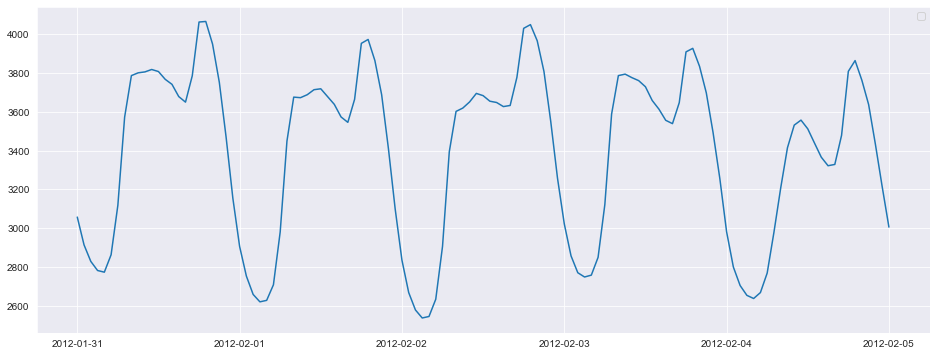

In [19]:
# Define figure style, plot package and default figure size
sns.set_style("darkgrid")
pd.plotting.register_matplotlib_converters()
# Default figure size
sns.mpl.rc("figure", figsize=(16, 6))
# Use plot_predict and visualize forecasts
figure = results.plot_predict(720, 840)

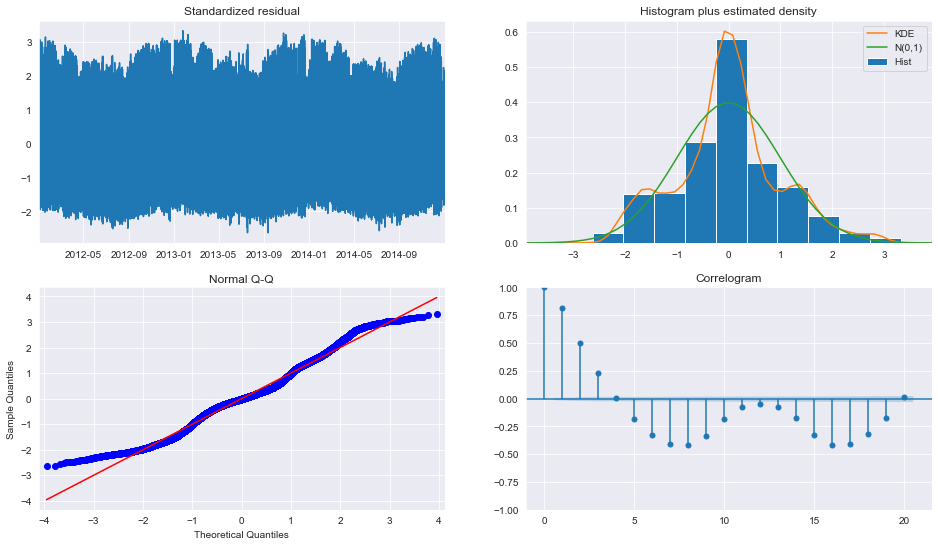

In [20]:
# Define default figure size
fig = plt.figure(figsize=(16,9))
# Use plot_predict and visualize forecasts
fig = results.plot_diagnostics(fig=fig, lags=20)

In [21]:
# Define the start date for the train and test sets
train_start_dt = '2014-11-01 00:00:00'
test_start_dt = '2014-12-30 00:00:00'

In [22]:
# Create train set containing only the model features
train = ts_data_load.copy()[
    (ts_data_load.index >= train_start_dt)
    & (ts_data_load.index < test_start_dt)][['load']]
test = ts_data_load.copy()[ts_data_load.index >= test_start_dt][['load']]
print('Training data shape: ', train.shape)
print('Test data shape: ', test.shape)

Training data shape:  (1416, 1)
Test data shape:  (48, 1)


In [23]:
# Scale train data to be in range (0, 1)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train['load'] = scaler.fit_transform(train)
train.head()
# Scale test data to be in range (0, 1)
test['load'] = scaler.transform(test)
test.head()

,load
2014-12-30 00:00:00,0.33
2014-12-30 01:00:00,0.29
2014-12-30 02:00:00,0.27
2014-12-30 03:00:00,0.27
2014-12-30 04:00:00,0.30


In [24]:
# Specify the number of steps to forecast ahead
HORIZON = 3
print('Forecasting horizon:', HORIZON, 'hours')

Forecasting horizon: 3 hours


In [25]:
# Create a test data point for each HORIZON
test_shifted = test.copy()
for t in range(1, HORIZON):
    test_shifted['load+'+str(t)] = test_shifted['load'].shift(-t, freq='H')

#test_shifted = test_shifted.dropna(how='any')
test_shifted.head()

,load,load+1,load+2
2014-12-30 00:00:00,0.33,0.29,0.27
2014-12-30 01:00:00,0.29,0.27,0.27
2014-12-30 02:00:00,0.27,0.27,0.30
2014-12-30 03:00:00,0.27,0.30,0.41
2014-12-30 04:00:00,0.30,0.41,0.57


In [27]:
model = AutoReg(ts_data_load, 1)
model_fit = model.fit()
yhat = model_fit.predict
print(yhat)

<bound method AutoRegResults.predict of <statsmodels.tsa.ar_model.AutoRegResultsWrapper object at 0x00000032DEAB5978>>


In [29]:
%%time
# Make predictions on the test data
training_window = 720
train_ts = train['load']
test_ts = test_shifted
history = [x for x in train_ts]
history = history[(-training_window):]
predictions = list()
for t in range(test_ts.shape[0]):
    model = AutoReg(ts_data_load, 1)
    model_fit = model.fit()
    yhat = model_fit.predict
    predictions.append(yhat)
    obs = list(test_ts.iloc[t])
    # move the training window
    history.append(obs[0])
    history.pop(0)
    print(test_ts.index[t])
    print(t+1, ': predicted =', yhat, 'expected =', obs)

2014-12-30 00:00:00
1 : predicted = <bound method AutoRegResults.predict of <statsmodels.tsa.ar_model.AutoRegResultsWrapper object at 0x00000032DEBD30B8>> expected = [0.32945389435989236, 0.2900626678603402, 0.2739480752014323]
2014-12-30 01:00:00
2 : predicted = <bound method AutoRegResults.predict of <statsmodels.tsa.ar_model.AutoRegResultsWrapper object at 0x00000032DEBD3048>> expected = [0.2900626678603402, 0.2739480752014323, 0.26812891674127126]
2014-12-30 02:00:00
3 : predicted = <bound method AutoRegResults.predict of <statsmodels.tsa.ar_model.AutoRegResultsWrapper object at 0x00000032DEBD3400>> expected = [0.2739480752014323, 0.26812891674127126, 0.3025962399283795]
2014-12-30 03:00:00
4 : predicted = <bound method AutoRegResults.predict of <statsmodels.tsa.ar_model.AutoRegResultsWrapper object at 0x00000032DEBD36D8>> expected = [0.26812891674127126, 0.3025962399283795, 0.40823634735899716]
2014-12-30 04:00:00
5 : predicted = <bound method AutoRegResults.predict of <statsmodel

            Temp
Date            
1981-01-01 20.70
1981-01-02 17.90
1981-01-03 18.80
1981-01-04 14.60
1981-01-05 15.80


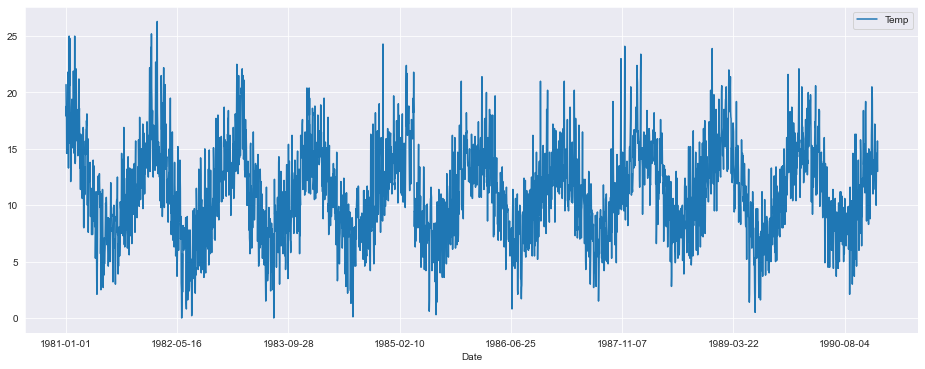

In [30]:
from pandas import read_csv


series = pd.read_csv('E:\datasets\daily_min_temperatures\daily-min-temperatures.csv', header=0, index_col=0)
print(series.head())
series.plot()
pyplot.show()

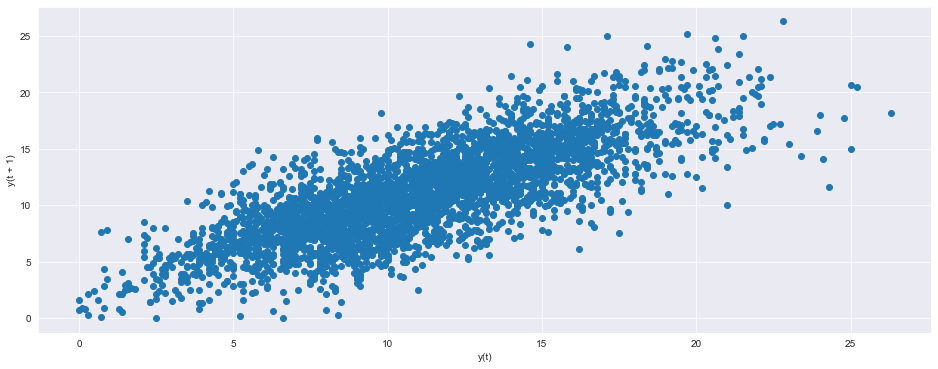

In [31]:
lag_plot(series)
pyplot.show()

In [32]:
values = pd.DataFrame(series.values)
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
print(result)

     t-1  t+1
t-1 1.00 0.77
t+1 0.77 1.00


In [33]:
values.head()

,0
0,20.70
1,17.90
2,18.80
3,14.60
4,15.80


In [34]:
dataframe.head()

,t-1,t+1
0,nan,20.70
1,20.70,17.90
2,17.90,18.80
3,18.80,14.60
4,14.60,15.80


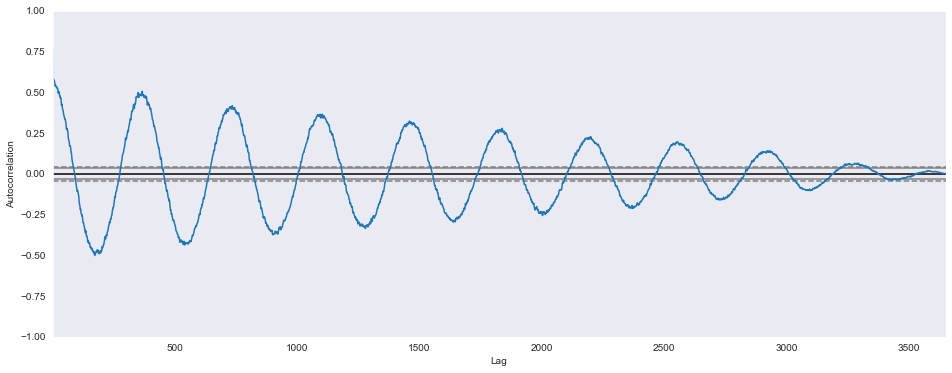

In [35]:
autocorrelation_plot(series)
pyplot.show()

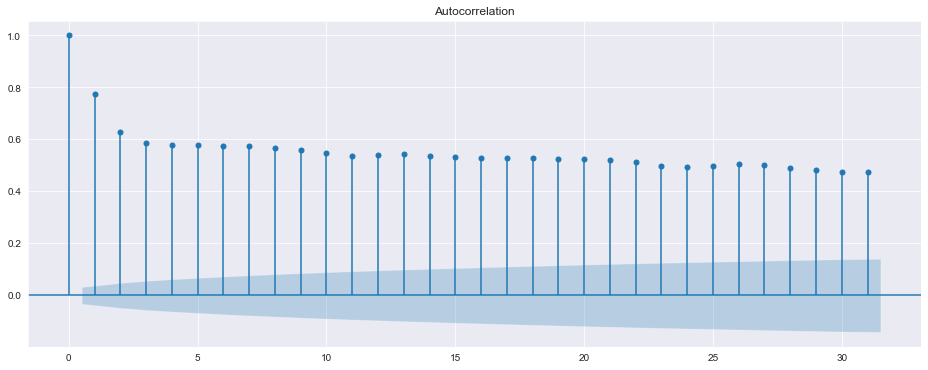

In [36]:
plot_acf(series, lags=31)
pyplot.show()

Test MSE: 3.423


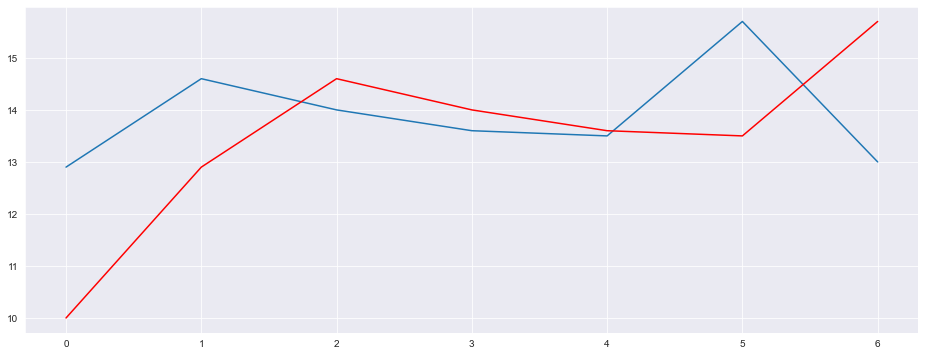

In [37]:
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
series = read_csv('E:\datasets\daily_min_temperatures\daily-min-temperatures.csv', header=0, index_col=0)
# create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
# split into train and test sets
X = dataframe.values
train, test = X[1:len(X)-7], X[len(X)-7:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
 
# persistence model
def model_persistence(x):
    return x
 
# walk-forward validation
predictions = list()
for x in test_X:
    yhat = model_persistence(x)
    predictions.append(yhat)
test_score = mean_squared_error(test_y, predictions)
print('Test MSE: %.3f' % test_score)
# plot predictions vs expected
pyplot.plot(test_y)
pyplot.plot(predictions, color='red')
pyplot.show()

Coefficients: [ 5.58e-01  5.89e-01 -9.08e-02  4.83e-02  4.01e-02  3.93e-02  2.59e-02
  4.47e-02  1.28e-02  3.74e-02 -8.12e-04  4.79e-03  1.85e-02  2.69e-02
  5.76e-04  2.48e-02  7.40e-03  9.92e-03  3.42e-02 -9.12e-03  2.42e-02
  1.88e-02  1.22e-02 -1.86e-02 -1.77e-03  1.67e-02  1.98e-02  9.83e-03
  6.23e-03 -1.38e-03]
Coefficients: 30
predicted=11.871275, expected=12.900000
predicted=13.053794, expected=14.600000
predicted=13.532591, expected=14.000000
predicted=13.243126, expected=13.600000
predicted=13.091438, expected=13.500000
predicted=13.146989, expected=15.700000
predicted=13.176153, expected=13.000000
Test RMSE: 1.225


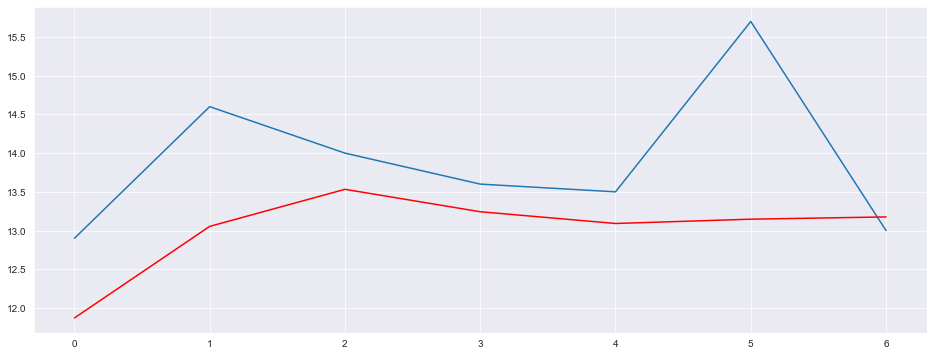

In [38]:
# create and evaluate a static autoregressive model
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset
series = read_csv('E:\datasets\daily_min_temperatures\daily-min-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
# split dataset
X = series.values

train, test = X[1:len(X)-7], X[len(X)-7:]

# train autoregression
model = AutoReg(train, lags=29)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)
print('Coefficients: %s' % len(model_fit.params))
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot results
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

Coefficients: [ 6.77e-01  5.87e-01 -8.93e-02  4.73e-02  3.89e-02  3.64e-02  2.49e-02
  4.49e-02  1.39e-02  3.75e-02  1.25e-03  6.24e-03  1.95e-02  2.37e-02
  5.18e-03  2.84e-02  5.62e-03  1.32e-02  3.69e-02 -1.17e-02  2.90e-02
  2.10e-02  1.18e-02 -1.06e-02 -3.49e-04  1.69e-02  2.27e-02  1.39e-02
  1.10e-02  3.02e-03 -1.25e-02  3.83e-02 -2.91e-02  1.35e-02  3.05e-02
 -2.93e-03 -1.55e-02 -3.17e-02  3.52e-02 -1.17e-02 -1.18e-02 -1.45e-02
  1.76e-03 -1.75e-02  6.40e-03 -2.80e-02]
Coefficients: 46
predicted=11.912734, expected=12.900000
predicted=13.374140, expected=14.600000
predicted=13.822933, expected=14.000000
predicted=13.112893, expected=13.600000
predicted=13.487495, expected=13.500000
predicted=13.678650, expected=15.700000
predicted=13.393980, expected=13.000000
Test RMSE: 0.999


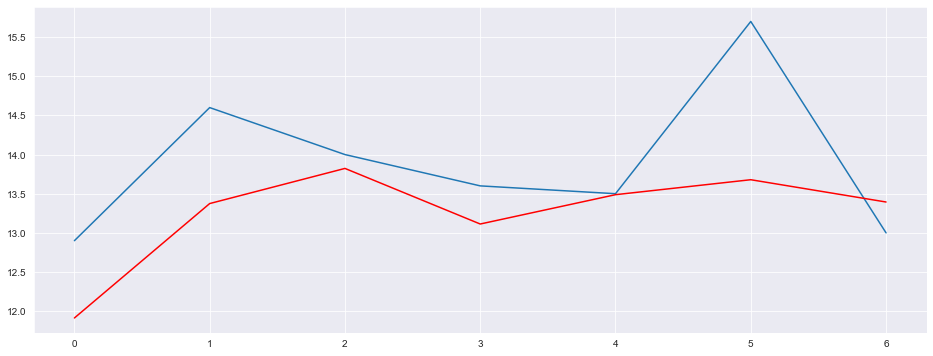

In [39]:
# create and evaluate a static autoregressive model
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset
series = read_csv('E:\datasets\daily_min_temperatures\daily-min-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
# split dataset
X = series.values

train, test = X[1:len(X)-7], X[len(X)-7:]

# train autoregression
model = AutoReg(train, lags=45)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)
print('Coefficients: %s' % len(model_fit.params))
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot results
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [40]:
# grid search ARIMA parameters for time series
import warnings
from math import sqrt
from pandas import read_csv
from pandas import datetime
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
 
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, ar_order):
    train, test = X[1:len(X)-7], X[len(X)-7:]
    # train autoregression
    model = AutoReg(train, lags=ar_order)
    model_fit = model.fit()
    #print('Coefficients: %s' % model_fit.params)
    #print('Coefficients: %s' % len(model_fit.params))
    # make predictions
    predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
    #for i in range(len(predictions)):
        #print('predicted=%f, expected=%f' % (predictions[i], test[i]))
    rmse = sqrt(mean_squared_error(test, predictions))
    #print('Test RMSE: %.3f' % rmse)
    return rmse
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        order = (p)
        try:
            rmse = evaluate_arima_model(dataset, order)
            if rmse < best_score:
                best_score, best_cfg = rmse, order
            print('ARIMA%s RMSE=%.3f' % (order,rmse))
        except:
            continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))


In [ ]:
p_values = range(5, 500, 5)
warnings.filterwarnings("ignore")
evaluate_models(X, p_values)

In [42]:
X[1:len(X)-7]

array([17.9, 18.8, 14.6, ..., 13.2, 13.9, 10. ])

[16.7 21.5]
[16.7, 21.5]
length:  2
yhat:  18.39689609139871
lag:  21.5
calc:  11.910858292168443
lag:  16.7
calc:  -10.122142677940584
predicted=20.185612, expected=25.000000
length:  3
yhat:  18.39689609139871
lag:  25.0
calc:  13.849835223451679
lag:  21.5
calc:  -13.031501052438477
predicted=19.215230, expected=20.700000
length:  4
yhat:  18.39689609139871
lag:  20.7
calc:  11.46766356501799
lag:  25.0
calc:  -15.152908200509858
predicted=14.711651, expected=20.600000
length:  5
yhat:  18.39689609139871
lag:  20.6
calc:  11.412264224124185
lag:  20.7
calc:  -12.546607990022162
predicted=17.262552, expected=24.800000
length:  6
yhat:  18.39689609139871
lag:  24.8
calc:  13.739036541664065
lag:  20.6
calc:  -12.485996357220124
predicted=19.649936, expected=17.700000
length:  7
yhat:  18.39689609139871
lag:  17.7
calc:  9.805683338203789
lag:  24.8
calc:  -15.031684934905778
predicted=13.170894, expected=15.500000
Test RMSE: 4.584


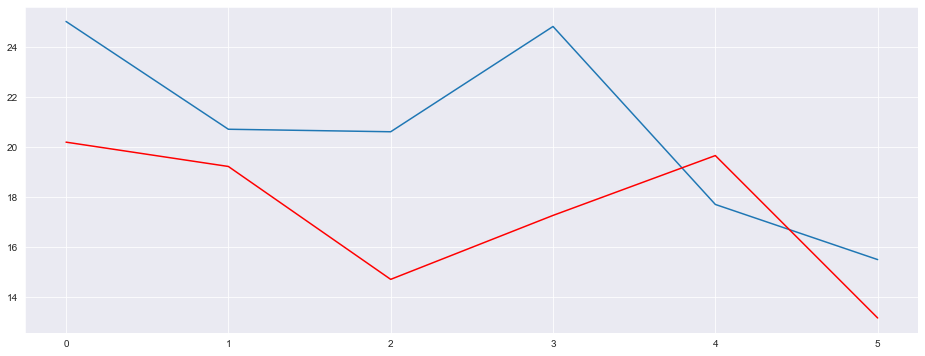

In [43]:
# create and evaluate an updated autoregressive model
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset
series = read_csv('E:\datasets\daily_min_temperatures\daily-min-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
# split dataset
X = series.values
X = X[:20]
train, test = X[:len(X)-6], X[len(X)-6:]
# train autoregression
window = 2
model = AutoReg(train, lags=2)
model_fit = model.fit()
coef = model_fit.params
# walk forward over time steps in test
history = train[len(train)-window:]
print(history)
history = [history[i] for i in range(len(history))]
print(history)
predictions = list()
for t in range(len(test)):
    length = len(history)
    print('length: ', length)
    lag = [history[i] for i in range(length-window,length)]
    yhat = coef[0]
    print('yhat: ',yhat)
    for d in range(window):
        yhat += coef[d+1] * lag[window-d-1]
        print('lag: ',lag[window-d-1])
        print("calc: ", coef[d+1] * lag[window-d-1])
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()